In [1]:
import numpy as np
from sklearn.base import clone
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error, roc_auc_score
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

sns.set()

In [2]:
def make_regression(func, n_elements, noise=0.0, random_state=None):
    rng = np.random.RandomState(random_state)
    x = rng.uniform(5.0, size=n_elements)
    n = rng.normal(scale=noise, size=n_elements)
    y = func(x) + n
    return x.reshape(-1, 1), y

In [3]:
X, y = make_regression(lambda x: x**2 + 2*x, 1000, random_state=0, noise=5.0)
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=0, test_size=0.2)

In [4]:
dist_x = np.concatenate([
    np.column_stack([train_X.ravel(), train_y]),
    np.column_stack([test_X.ravel(), test_y]),
])
dist_y = np.concatenate([np.ones_like(train_y), np.zeros_like(test_y)])

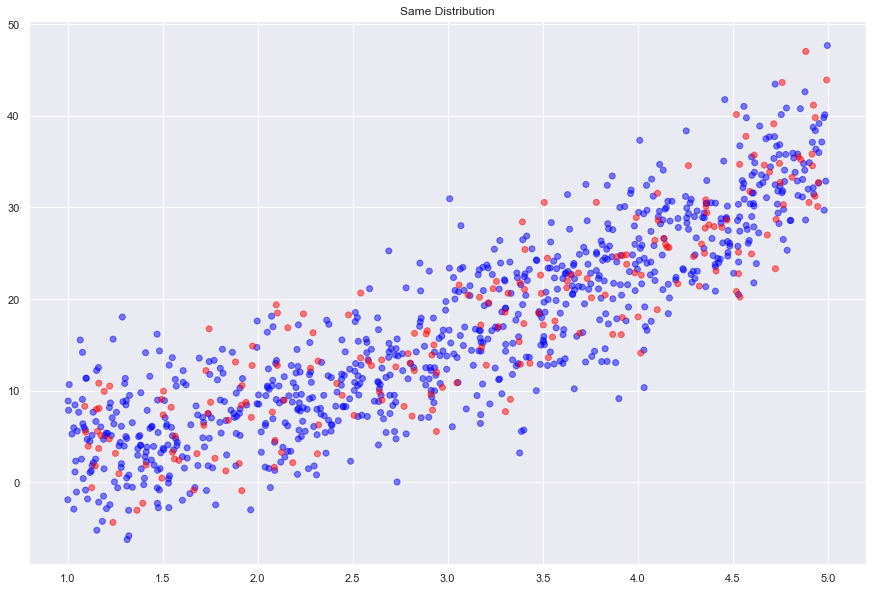

In [5]:
cm = ListedColormap(['#FF0000', '#0000FF'])

plt.figure(figsize=(15, 10))
plt.title(f'Same Distribution')
plt.scatter(*dist_x.T, c=dist_y, cmap=cm, alpha=0.5)
plt.show()

In [6]:
train_dist_X, test_dist_X, train_dist_y, test_dist_y = train_test_split(dist_x, dist_y, random_state=0, test_size=0.2)

dist_clf = RandomForestClassifier(n_estimators=100)
dist_clf.fit(train_dist_X, train_dist_y)
dist_pred = dist_clf.predict_proba(test_dist_X)[:, 1]
auc = roc_auc_score(test_dist_y, dist_pred)
print('Same Distribution')
print(f'AUC: {auc}')

Same Distribution
AUC: 0.43078125


In [7]:
train_idx, test_idx = train_test_split(np.argsort(X.ravel()), shuffle=False, test_size=0.2)
train_X, train_y = X[train_idx], y[train_idx]
test_X, test_y = X[test_idx], y[test_idx]

In [8]:
dist_x = np.concatenate([
    np.column_stack([train_X.ravel(), train_y]),
    np.column_stack([test_X.ravel(), test_y]),
])
dist_y = np.concatenate([np.ones_like(train_y), np.zeros_like(test_y)])

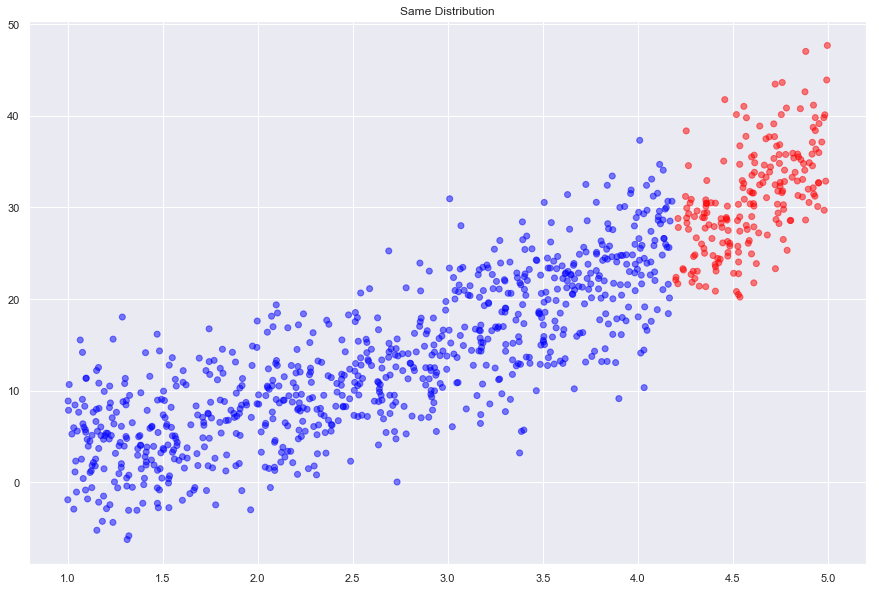

In [9]:
cm = ListedColormap(['#FF0000', '#0000FF'])

plt.figure(figsize=(15, 10))
plt.title(f'Same Distribution')
plt.scatter(*dist_x.T, c=dist_y, cmap=cm, alpha=0.5)
plt.show()

In [10]:
train_dist_X, test_dist_X, train_dist_y, test_dist_y = train_test_split(dist_x, dist_y, random_state=0, test_size=0.2)

dist_clf = RandomForestClassifier(n_estimators=100)
dist_clf.fit(train_dist_X, train_dist_y)
dist_pred = dist_clf.predict_proba(test_dist_X)[:, 1]
auc = roc_auc_score(test_dist_y, dist_pred)
print('Different Distribution')
print('Train has lower X then the Test')
print(f'AUC: {auc}')

Different Distribution
Train has lower X then the Test
AUC: 1.0
